# Polynomial Regression คืออะไร

คือ non-linear หรือไม่ใช่เส้นตรง

สมการเส้นตรงคือ $mx+c$

แต่เส้นโค้งคือ $c+ax+bx^{2}+dx^{3}+...+nx^{n}$

ผมเขียนให้มองง่ายว่า a,b,c,d....nตัว มีค่าที่ต่างกัน

ถ้าจะให้เป็นสมการจริง

$\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}$

เพื่อความง่าย ผมจะแนะนำ คุณน่าจะเคยเรียน สมการพาราโบลา 

สมการพาราโบลา เป็นส่วนหนึ่งใน สมการเส้นโค้งนี้

พาราโบลา $y=ax^{2}+k$

พาราโบลา ในสมการ Polynomial คือ $y=\beta_{2}x^{2}+\beta_{1}x+\beta_{0}$;แต่ $\beta_{2}=a;\beta_{1}=0;\beta_{0}=k$ 

ทำให้รูปเป็น พาราโบลา $y=ax^{2}+0x^{1}+k$ ทำให้  $y=ax^{2}+k$

# ทำดาต้า

import libary matplotlib numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## จำลองดาต้า

เพิ่มความเข้าใจ

ให้เป็น polynomial ยกกำลังถึง 3

$y=\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0}$

โดยให้ $\beta_{3}=4;\beta_{2}=[-80,90];\beta_{1}=-6;\beta_{0}=[-100,200]$

โดยสรุปได้ว่า $y=4x^{3}+[-80,90]x^{2}+-6x+[-100,200]$

และ x มีค่า [-20,30] ถึง 300 จำนวน

In [119]:
x = np.linspace(-20, 30, 200).reshape(-1, 1)
x

array([[-20.        ],
       [-19.74874372],
       [-19.49748744],
       [-19.24623116],
       [-18.99497487],
       [-18.74371859],
       [-18.49246231],
       [-18.24120603],
       [-17.98994975],
       [-17.73869347],
       [-17.48743719],
       [-17.2361809 ],
       [-16.98492462],
       [-16.73366834],
       [-16.48241206],
       [-16.23115578],
       [-15.9798995 ],
       [-15.72864322],
       [-15.47738693],
       [-15.22613065],
       [-14.97487437],
       [-14.72361809],
       [-14.47236181],
       [-14.22110553],
       [-13.96984925],
       [-13.71859296],
       [-13.46733668],
       [-13.2160804 ],
       [-12.96482412],
       [-12.71356784],
       [-12.46231156],
       [-12.21105528],
       [-11.95979899],
       [-11.70854271],
       [-11.45728643],
       [-11.20603015],
       [-10.95477387],
       [-10.70351759],
       [-10.45226131],
       [-10.20100503],
       [ -9.94974874],
       [ -9.69849246],
       [ -9.44723618],
       [ -9

$y=4x^{3}+[-80,90]x^{2}+-6x+[-100,200]$ + noise

ทำต้อง บวก noise เพราะ อยากให้เส้นมันกระจายลองลบดูสิ noise เส้นจะไม่กระจ่าย

In [122]:
y=4*x**3 + np.random.uniform(low=-80, high=90)*x**2 + -6*x + np.random.uniform(low=-100, high=200) + np.random.normal(0, 3000, size=x.shape)


In [ ]:
y

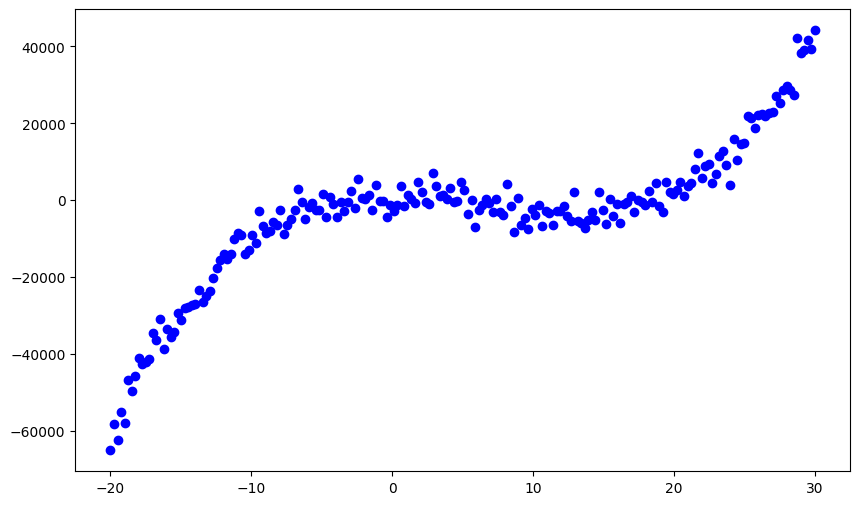

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')

## loss function 

เราก็ใช้ เหมือนเดิมครับ

MSE = $\frac{1}{n}\sum_{i=0}^{n}(y_{i}-\hat{y_{i}})$

อันเดียวกับ linear regression

In [6]:
def loss_function(y,y_pred):
    return np.mean((y - y_pred)**2)

## ออกแบบ f(x)

เนื่องจากสมการ 

> $\beta_{0}+\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}+...+\beta_{n}x^{n}$

มีความต่อเนื่องไปเรื่อยๆ ทำให้เราไม่รู้ degree หรือจำนวนเลขยกกำลังที่จะเดา

แต่ในดาต้าเรามีความกำหนดให้สูงสุดอยู่แค่ 3 แต่เราจะไปปรับใช้งานจริง อาจจะมีมากหรือน้อยกว่านี้เยอะ

ทำให้การออกแบบไม่เหมือนกับบทก่อนหน้า

โดยให้ betas เป็นเหมือน $\beta_{i}$

การทำการ loop ด้วย i(power) และ ค่า betas(coef)

coeffs คือ *coefficient* คือค่าสัมประสิทธิ์ เลขตัวหน้า x เช่น 3x coeffs คือ 3 หรือ beta นั้นเลย

ซึ่งโค้ดนี่ผลลัพท์จะเหมือนสมการ ด้านบนเลย

In [53]:
def f(x,coeffs):
    y = np.zeros_like(x, dtype=float)
    for power, coef in enumerate(coeffs):
        y += coef * x**power
    return y


In [109]:
degree = 5
coeffs = np.random.uniform(0, 0, size=degree + 1)

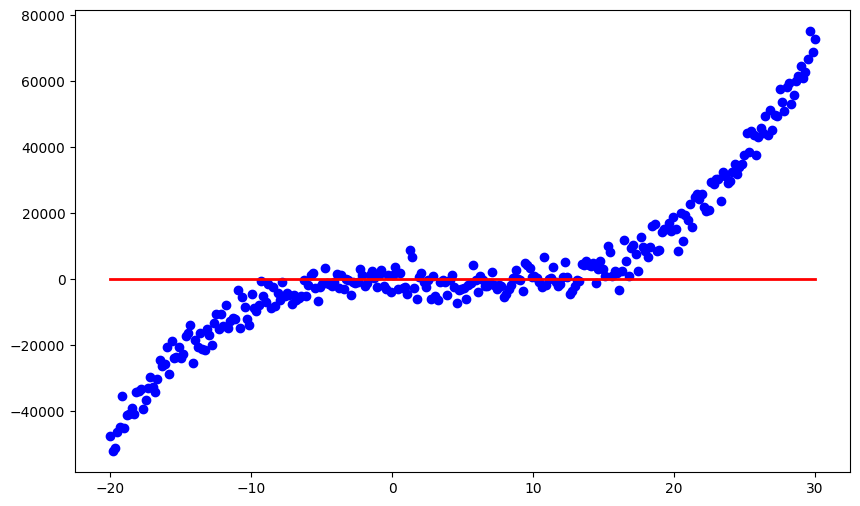

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, f(x, coeffs), color='red', linewidth=2)

เส้นนี้ให้เริ่มเดาที่ 0,0

# ทำ gradient descent

ทำโดยทำการ diff loss function

ซึ่งผมจะ diff แยก $\beta_{i}$

แต่สุดแล้ว ถ้า แยก ตัว $\beta_{i}$ จะหายไปเหลือ $x^{n}$

ตย. degree =5 จะได้ว่าเราจะต้อง diff $\beta_{n=1,2,3,4,5}$ 5 ครั้ง


แสดงว่า $\hat{y} = \beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0}$

จาก

$\frac{\partial}{\partial \hat{y_{i}}}(\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2})$ 

แก้เป็น

$\frac{\partial}{\partial \hat{y_{i}}}(\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0})^{2})$

แล้ว diff by $\beta_{5}$ ตัวแรก $\frac{\partial}{\partial \beta_{5}}$

$\frac{\partial}{\partial \beta_{5}}(\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0})^{2}) =$

$2*\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0}) * \frac{\partial}{\partial \beta}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0})  $

$2*\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0})* (0-x^{5}+0+0+0+0+0)$

$2*\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0})* -x^{5}$

หรือรูปอย่างง่ายคือ $\frac{-2x^{5}}{n}\sum_{i=1}^{n}(y_{i}-\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0}) $ 

หรือ $\frac{-2x^{5}}{n}\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})$ เนื่องจาก $\hat{y_{i}}=\beta_{5}x^{5}+\beta_{4}x^{4}+\beta_{3}x^{3}+\beta_{2}x^{2}+\beta_{1}x+\beta_{0}$

หรือ คุณ - เข้าไปจะได้ $\frac{2x^{5}}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})$

ถ้าเรา diff by $\beta_{4}$ จะได้ $\frac{2x^{4}}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})$

ถ้าเรา diff by $\beta_{3}$ จะได้ $\frac{2x^{3}}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})$

ซึ่งเหมือนกันมาก โดยโค้ดที่แสดงอยู่ทำการเขียนในลักษณะนี้แล้วนั้นเอง

In [84]:
def gradient(x, y, betas):
    y_hat = f(x, betas)
    grads = []
    for j in range(len(betas)):
        grad_j =np.mean( 2*(x ** j) * (y_hat - y))
        grads.append(grad_j)
    return np.array(grads)

# ทำการเทรน

ทำการให้ betas = [0,0,0,0,0,0] ค่าเริ่มต้น

learning_rate = 1e-16 คือ 0.0000000000000001


degree = 5

ทำไมถึงเป็น degree 5 ผมสมมติว่าเราไม่รู้ว่า degree ของเส้นนี้จริงๆเท่าไหร่ ผมทำการสุ่มนะครับเพิ่มความไม่ยากมากเลยทำให้ผมเอา 5 


ขนาด 5 คือ ใช้ learning_rate = 1e-16 น้อยมากในการอัปเดทค่า

In [159]:
degree = 5
learning_rate = 1e-14
betas = np.random.uniform(0, 0, size=degree + 1)
for i in range(40000):
    y_pred = f(x, betas)
    grads = gradient(x, y, betas)
    betas -= learning_rate * grads
    if i % 200 == 0:
        print(f"Iteration {i},Coefficients: {betas} Loss: {loss_function(y, y_pred):.4f}")

Iteration 0,Coefficients: [-7.25787414e-11  4.05825442e-09  1.73298827e-08  2.09579324e-06
  3.03558866e-05  1.33290007e-03] Loss: 358069107.9817
Iteration 200,Coefficients: [-3.20727646e-08  2.83647785e-07 -9.14034915e-06  5.78647207e-05
 -3.29824502e-03  2.07953354e-03] Loss: 221701819.2072
Iteration 400,Coefficients: [-6.36915686e-08  5.60042237e-07 -1.81901246e-05  1.12456330e-04
 -6.59963747e-03  2.19650769e-03] Loss: 216243141.1852
Iteration 600,Coefficients: [-9.48934326e-08  8.34524645e-07 -2.71040493e-05  1.66733285e-04
 -9.85228985e-03  2.31175423e-03] Loss: 210944425.1885
Iteration 800,Coefficients: [-1.25684512e-07  1.10712320e-06 -3.58841292e-05  2.20700222e-04
 -1.30569217e-02  2.42529865e-03] Loss: 205800983.1873
Iteration 1000,Coefficients: [-1.56070873e-07  1.37786567e-06 -4.45323401e-05  2.74361708e-04
 -1.62142419e-02  2.53716608e-03] Loss: 200808264.5446
Iteration 1200,Coefficients: [-1.86058490e-07  1.64677943e-06 -5.30506292e-05  3.27722246e-04
 -1.93249489e-02  2

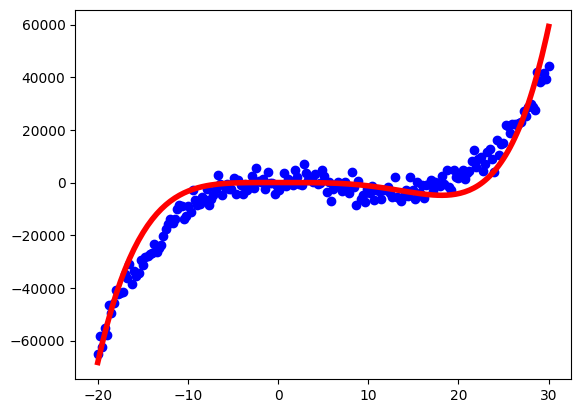

In [155]:
plt.scatter(x, y, color='blue')
plt.plot(x, f(x, betas), color='red', linewidth=4)

ผลลัพทํเป็นสิ่งที่ ok เลย

ถ้าอยากให้มันดีกว่านี้ลองสุ่ม degree ดูครับอันไหนเหมาะสมสุดซึ่งผมเอา degree 3 นะครับ


learning_rate = 1e-8

In [161]:
degree = 3
learning_rate = 1e-8
betas = np.random.uniform(0, 0, size=degree + 1)
for i in range(3000):
    y_pred = f(x, betas)
    grads = gradient(x, y, betas)
    betas -= learning_rate * grads
    if i % 100 == 0:
        print(f"Iteration {i},Coefficients: {betas} Loss: {loss_function(y, y_pred):.4f}")

Iteration 0,Coefficients: [-7.25787414e-05  4.05825442e-03  1.73298827e-02  2.09579324e+00] Loss: 358069107.9817
Iteration 100,Coefficients: [-0.01685109  0.06118418 -5.0572432   1.71244838] Loss: 170770930.2406
Iteration 200,Coefficients: [-0.03237305  0.11485043 -9.75619669  1.86895745] Loss: 148628936.4308
Iteration 300,Coefficients: [ -0.04675208   0.1644555  -14.12315779   2.01440922] Loss: 129505213.6505
Iteration 400,Coefficients: [ -0.06006894   0.21028637 -18.18158279   2.14958492] Loss: 112988328.0312
Iteration 500,Coefficients: [ -0.07239867   0.2526097  -21.95327074   2.27521059] Loss: 98722930.0741
Iteration 600,Coefficients: [ -0.08381101   0.29167334 -25.45848051   2.39196096] Loss: 86402109.5416
Iteration 700,Coefficients: [ -0.09437078   0.32770763 -28.71603963   2.50046312] Loss: 75760792.4877
Iteration 800,Coefficients: [ -0.10413821   0.36092662 -31.74344539   2.60129981] Loss: 66570038.3679
Iteration 900,Coefficients: [ -0.11316929   0.39152925 -34.55695886   2.695

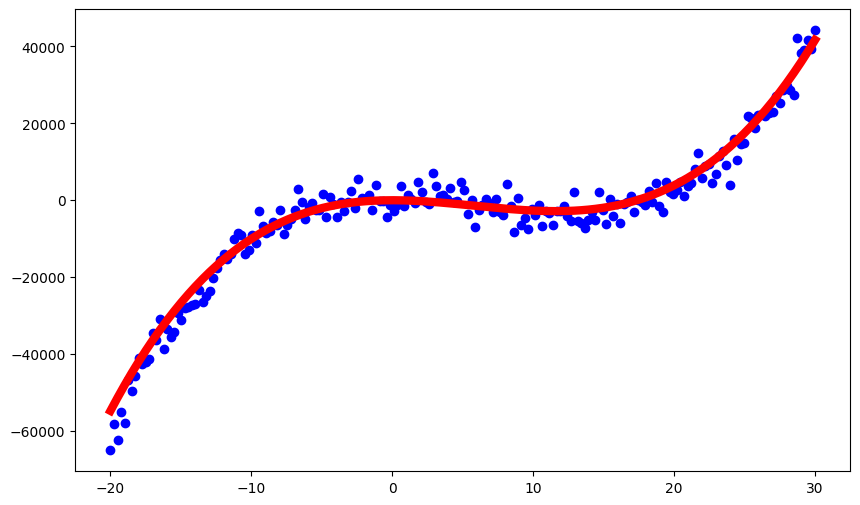

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(x, f(x, betas), color='red', linewidth=6)

จากตัวอย่าง เราสามารถเดา degree ได้ และเดา learning_rate ด้วยว่าเกินไปหรือไม่เกินไปด้วย

ลองสุ่มดูครับ ผมได้ลอง degree =5 learning_rate=1e-13 แล้วแตกเลยเพิ่มขึ้นเป็น 1e-14 แล้วทำงานดี

แต่ว่ายัง degree 3 ก็เร็วกว่า ดีกว่าอยู่ดี

และแล้ว เส้นของคุณโค้งหรือยังครับ